# **HeartAttackPredictor**
Hello My name is **Kwabena Ampomah**. I created this heart attack predictor project to improve and test my skills in machine learning. For my data i will be using the heart.csv dataset from Kaggle.

### Dataset info

- **Age**: The age of individuals, a crucial factor in heart health assessment.
- **Sex**: Gender specification, distinguishing between male and female subjects.
- **Chest Pain**: A scale from 0 to 3, indicative of chest pain severity.
- **Cholesterol**: Serum cholesterol levels (mg/dL), a key metric in heart health evaluation.
- **Fasting Blood Sugar Level**: A boolean indicator representing fasting blood sugar levels (>120 mg/dL).
- **Resting Electrocardiographic Results**: Resting electrocardiographic measurements (scale: 0-2).
- **Max Heart Rate**: Maximum heart rate achieved during activity.
- **Exercise-Induced Angina**: Presence of exercise-induced angina (boolean).
- **Oldpeak**: ST depression induced by exercise relative to rest (float).




In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**These are the necessary packages for plotting and processing the data**

In [65]:
theheartpart4 = pd.read_csv("heart.csv")

In [66]:
theheartpart4

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
num_rows = theheartpart4.shape[0]
print("Number of rows:", num_rows)

Number of rows: 303


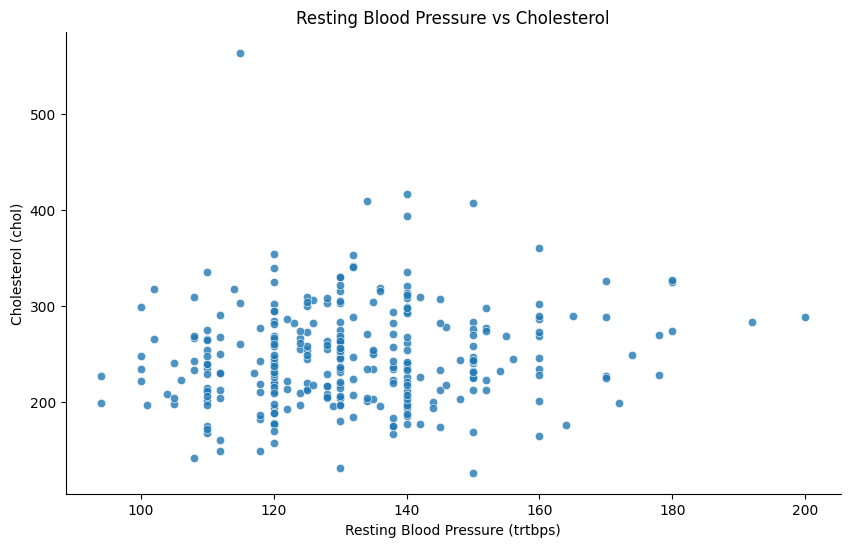

In [68]:
# @title Resting blood Pressure vs cholestoral

def plot_resting_bp_vs_chol(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='trtbps', y='chol', data=data, alpha=0.8)
    plt.title('Resting Blood Pressure vs Cholesterol')
    plt.xlabel('Resting Blood Pressure (trtbps)')
    plt.ylabel('Cholesterol (chol)')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

plot_resting_bp_vs_chol(theheartpart4)

# **Data implications**
Research backs that high cholesterol leads to buildup in the bodies arteries which makes it more difficult for the blood to flow. Therefore the heart has to pump more frequently to get the natural flow thoughout the body. This relationship will be vital as we dive into the machine learing  real life implications

In [69]:
unique_vars = theheartpart4.apply(lambda x: x.nunique()).to_frame(name='unique').transpose()

print(unique_vars)

        age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
unique   41    2   4      49   152    2        3        91     2       40   

        slp  caa  thall  output  
unique    3    5      4       2  


In [70]:
theheartpart4.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

all the values are ints or floates therefore  i dont need to change the datatypes ot begin machine learning

# **Data Preprocessing for Machine Learning Analysis**

As part of the preprocessing stage, non-numeric data such as gender or chest pain was converted into a numerical format to facilitate processing by the machine learning model. For instance, in the "sex" category, male was represented as 1 and female as 0.

Following the initial data processing, continuous variables such as cholesterol and blood pressure levels were scaled to ensure uniformity in their ranges. Given the wide assortment of values, scaling helps to mitigate the influence of outliers. This process involves placing these values within a specific range, ensuring that the model's performance is not unduly affected by extreme data points.

In [71]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [72]:
def preprocess_data(data):
    # Encode categorical columns
    #cat_cols is utilized to change qualitative in quantitative data
    cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
    #use pd.get pandas to  convert cat into numeric data
    data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

    # Define features and target
    X = data_encoded.drop(['output'], axis=1)
    y = data_encoded['output']

    # Scale continuous features
    con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
    #scaling the values to a neater range(doesnt manipulate data!)
    scaler = RobustScaler()
    #fit calulates averages and trnasform scales the columns to those averages
    X[con_cols] = scaler.fit_transform(X[con_cols])

    return X, y

In [73]:
X, y = preprocess_data(theheartpart4)

# **Machine Learning **
This is where we implement the Train-test split  process. I seperate the data into two subsets fo training and testing to create model performance.The difference in mine is i use 80% of  of the data from the dataset in my training subset so majority of the data is fed to the model to create an accurate prediction leaving the other 20% which in the case is 60


In [74]:
# Train-test split
#the test size is limited to 20 percent of data though testsize=.2 and random state which keeps reporducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is (242, 22)
The shape of X_test is (61, 22)
The shape of y_train is (242,)
The shape of y_test is (61,)


# **Addressing Bias in Heart Attack Research**

While my model offers crucial insights into heart attacks across all genders, it's important to acknowledge the bias inherent in my male-dominated dataset, where there is a 3:2 ratio of males to females.

In [75]:
def train_evaluate_model(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The test accuracy score of SVM is {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

train_evaluate_model(X_train, X_test, y_train, y_test)

The test accuracy score of SVM is 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.97      0.81      0.88        37

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



# **Reflection on Results**
  Through SVM the dataset predicted 87 percent of the dataset right.Even though that is commendable it probably suggest some error in my process.
# **Precision**
**ensuring no false positves**

In the data next to precesion you can see 0 and 1. The class 0 presion of 77 predicts i get 77% of no heart attack cases right and 91% of heart attack cases correct.
# **Recall**
**ensuring all positives are tracked**

Recall is solely focused on positives so i got 96% positves for no heart attack and 81 percent positves for heart attack correct
# **F1 Score**
the f1 score is just a summary of how well my model perfoms averaging accuracy and recall

